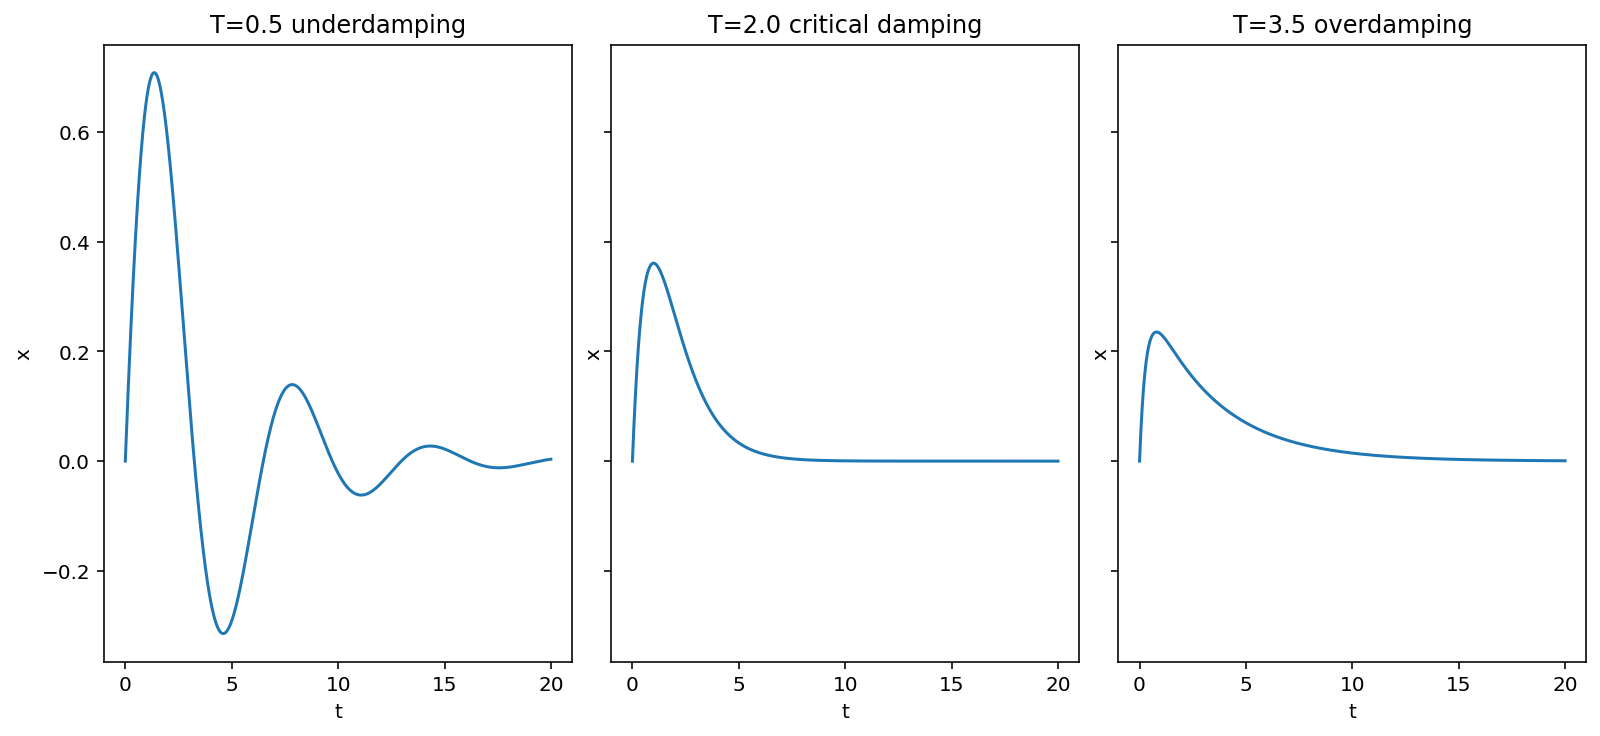

In [71]:
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

dt_now=datetime.datetime.now()

fig, axs=plt.subplots(1, 3, figsize=(11,5), sharey=True, constrained_layout=True)

label=[' underdamping', ' critical damping', ' overdamping']

for i in range(0,3):
    
    csv_name='Euler_T='+str((i*3+1)/2)+'_'+dt_now.strftime('%Y%m%d_%H%M%S') + '.csv'

    x_0=0
    v_0=1
    x_old=x_0
    v_old=v_0
    delta=100
    delta_t=1/delta
    t=20

    T=(i*3+1)/2
    
    with open(csv_name,'a') as f:
            w=csv.writer(f)
            w.writerow(['t','x'])

    for j in range(0,t*delta):
        with open(csv_name,'a') as f:
            w=csv.writer(f)
            w.writerow([j*delta_t,x_old])
        v_old=v_old*(1-T*delta_t)-x_old*delta_t
        x_old=x_old+v_old*delta_t

    input_csv=pd.read_csv(csv_name)
    x=input_csv[input_csv.keys()[0]]
    y=input_csv[input_csv.keys()[1]]
    axs[i].plot(x,y)
    axs[i].set_title('T='+str(T)+str(label[i]))
    axs[i].set_ylabel('x')
    axs[i].set_xlabel('t')

plt.show()